
# Project: No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling<ul>
    <li><a href="Properties"> General properties of the dataset</ul>
<li><a href="#Cleaning">Data Cleaning<ul>
    <li><a href="Step 1"> Formatting dates</a></li>
    <li><a href="Step 2"> Spelling mistakes</a></li>
    <li><a href="Step 3"> Correcting Age outliers</a></li>
    <li><a href="Step 4"> Correcting Handcap outliers</ul>
<li><a href="#Exploratory">Exploratory Data Analysis<ul>
    <li><a href="#Question 1">How many patients who received SMS showed up for the appointment</a></li>
    <li><a href="#Question 2"> Does Gender affect the number of patients who show up</a></li>
    <li><a href="#Question 3"> How many patients showed up on the appointment date as scheduled </a></li>
    <li><a href="#Question 4"> Is age group a factor to consider for show up </a></li>
    <li><a href="#Question 5"> Does Neighbourhood affect showing up of the patients </a></li>
    <li><a href="#Question 6"> Does Scholarship affect showing up</a></li>
    <li><a href="#Question 7"> Does having diabetes affect showing up </a></li>
    <li><a href="#Question 8"> Does having Hypertension affect showing up</a></li>
    <li><a href="#Question 9"> Does being handcap affect showing up</a></li>
    <li><a href="#Question 10"> Does being alcoholic affect showing up</ul>
<li><a href="#conclusions">Conclusions</a></li>


<a id='intro'></a>
## Introduction

>The 'No-show-appointments' is a dataset collected from 100K medical appointments in Brazil. We will be interested on finding out whether or not patients show up for their appointment and what factors to consider that will determine whether or not patients show up for their appointment day. 
*'ScheduledDay' tells us on what day the patient set up their appointment
*'Neighbourhood' indicates the location of the hospital 
*'Scholarship' indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Familia
*‘No-show’ says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up."


In [1283]:
# Importing statements
import pandas as pd 
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns




## Data Wrangling



Here, we are going to look at the general properties associated with our dataset. For example checking for missing values, confirming the number of rows and columns in the dataset, checking for uniqueness etc. 

In [1284]:
# Loading No-show appointments data 
df=pd.read_csv(r"C:\Users\Angela\Desktop\Udacity-No-Show Appointment\noshowappointments-kagglev2-may-2016 (1).csv")
df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [1285]:
#Checking for the number of entries in the dataset 
df.shape

(110527, 14)

There are 110527 rows and 14 columns

In [1286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no missing values in our columns 

In [1287]:
#checking whether there is an empty set
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no empty row or column

In [1289]:
#checking for uniqueness
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [1310]:
#Summary of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,DaysAfterAppointment
count,1.067760e+05,1.067760e+05,106776.000000,106776.000000,106776.000000,106776.000000,106776.000000,106776.000000,106776.000000,106776.000000
mean,1.473025e+14,5.675426e+06,38.294739,0.101062,0.203370,0.073987,0.031393,0.019059,0.323453,10.170638
std,2.558515e+14,7.133843e+04,22.445968,0.301412,0.402507,0.261750,0.174378,0.136732,0.467796,15.266684
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175435e+12,5.640482e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680740e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.433654e+13,5.725629e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000




### Data Cleaning

In this stage, we want to work on the outliers identified in our Data Wrangling stage. Some changes would include formating dates to the required type, checking on spelling mistakes and removing outliers in the age and handcap column. 

## 1.Formatting dates 

In [1312]:
#Converting dates to datetime format  
df.AppointmentDay = pd.to_datetime(df.AppointmentDay).dt.date
df.ScheduledDay = pd.to_datetime(df.ScheduledDay).dt.date
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show,DaysAfterAppointment,AgeGroup
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,60-70
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,50-60
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,60-70
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1-10
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,50-60


In [1313]:
#Creating the difference in days between AppointmentDay and Scheduled Day called DaysAfterAppointment 

df['DaysAfterAppointment'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,DaysAfterAppointment
count,1.067760e+05,1.067760e+05,106776.000000,106776.000000,106776.000000,106776.000000,106776.000000,106776.000000,106776.000000,106776.000000
mean,1.473025e+14,5.675426e+06,38.294739,0.101062,0.203370,0.073987,0.031393,0.019059,0.323453,10.170638
std,2.558515e+14,7.133843e+04,22.445968,0.301412,0.402507,0.261750,0.174378,0.136732,0.467796,15.266684
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175435e+12,5.640482e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680740e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.433654e+13,5.725629e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [1314]:
#Checking values in the DaysAfterAppointment that are less than 0days 
(df['DaysAfterAppointment']<0).value_counts()

False    106776
Name: DaysAfterAppointment, dtype: int64

In [1315]:
#Drop all the DaysAfterAppointment where value is less than 0
df.drop(df[df['DaysAfterAppointment'] < 0].index, inplace = True)


In [1316]:
#confirm the changes
(df['DaysAfterAppointment']<0).value_counts()

False    106776
Name: DaysAfterAppointment, dtype: int64

In [1317]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,DaysAfterAppointment
count,1.067760e+05,1.067760e+05,106776.000000,106776.000000,106776.000000,106776.000000,106776.000000,106776.000000,106776.000000,106776.000000
mean,1.473025e+14,5.675426e+06,38.294739,0.101062,0.203370,0.073987,0.031393,0.019059,0.323453,10.170638
std,2.558515e+14,7.133843e+04,22.445968,0.301412,0.402507,0.261750,0.174378,0.136732,0.467796,15.266684
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175435e+12,5.640482e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680740e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.433654e+13,5.725629e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


According to the DaysAfterAppointment column, a difference of 0 implies that the patient showed up for the appointment on the same day that they scheduled it and a difference greater than 0 shows those whose appointment day was not the same as the scheduled day.

## 2.Spelling mistakes 


In [1318]:
#Renaming columns 
df.rename(columns={'Hipertension':'Hypertension','No-show':'No_Show'},inplace=True)
#confirming changes 
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show,DaysAfterAppointment,AgeGroup
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,60-70
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,50-60
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,60-70
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1-10
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,50-60


## 3.Correcting Age outliers

From our description above, we identified the minimum age to be -1 and maximum to be 115. In our next step, we want to drop off ages below 0 and above 100 so that we can be able to get a clear view of our output.

In [1319]:
#Checking age below 0
(df['Age']<0).value_counts()

False    106776
Name: Age, dtype: int64

In [1320]:
#Checking age above 100
(df['Age']>100).value_counts()

False    106776
Name: Age, dtype: int64

In [1321]:
#Dropping off the age that is less than 0 and more than 100
df.drop(df[df['Age'] < 1].index, inplace = True)
df.drop(df[df['Age'] >100].index, inplace = True)
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,DaysAfterAppointment
count,1.067760e+05,1.067760e+05,106776.000000,106776.000000,106776.000000,106776.000000,106776.000000,106776.000000,106776.000000,106776.000000
mean,1.473025e+14,5.675426e+06,38.294739,0.101062,0.203370,0.073987,0.031393,0.019059,0.323453,10.170638
std,2.558515e+14,7.133843e+04,22.445968,0.301412,0.402507,0.261750,0.174378,0.136732,0.467796,15.266684
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175435e+12,5.640482e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680740e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.433654e+13,5.725629e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [1322]:
#confirming changes whether -1 and above 100 years has been dropped
df['No_Show'].groupby(df['Age']).value_counts()

Age  No_Show
1    No         1858
     Yes         415
2    No         1366
     Yes         252
3    No         1236
                ... 
97   Yes           2
98   No            5
     Yes           1
99   No            1
100  No            4
Name: No_Show, Length: 198, dtype: int64

The reason for dropping ages below 1 and above 100 is because it is impossible to have an age of -1 and on rare occasion does a lifespan of human being go above 100 years.

In [1323]:
#Creating Age groups
bins=[1,10,20,30,40,50,60,70,80,90,100]
labels=['1-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [1324]:
#Confirming whether the column 'AgeGroup' has been added
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show,DaysAfterAppointment,AgeGroup
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,60-70
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,50-60
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,60-70
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1-10
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,50-60


## 4.Handcap and outliers

In [1325]:
#Checking general information about those who are handcapped and No_show
df['No_Show'].groupby(df['Handcap']).value_counts()


Handcap  No_Show
0        No         83471
         Yes        21270
1        No          1674
         Yes          361
Name: No_Show, dtype: int64

According to the value counts above, it's difficult to tell which value represents those who are handcapped or not because they are using 0 to 4.

In [1326]:
#Checking those who are handcap and are represented with a figure greater than 1
(df['Handcap']>1).value_counts()

False    106776
Name: Handcap, dtype: int64

In [1327]:
#Dropping those who are handcap and are represented by a figure greater than 1
df.drop(df[df['Handcap']>1].index,inplace=True)

In [1328]:
#confirming changes
df['No_Show'].groupby(df['Handcap']).value_counts()

Handcap  No_Show
0        No         83471
         Yes        21270
1        No          1674
         Yes          361
Name: No_Show, dtype: int64

The reason for removing values greater than 1 that represent those with handcap, I want to only have two values, 0 and 1 where 0 represents those who are not handcap and 1 those who are handcap for clarity. 


## Exploratory Data Analysis




In this stage, we are going to pose questions as identified after our dataset has been cleaned and answer each question with  visuals. 
The visuals will basically be a relationship between two variables.

In [1329]:
#Creating a User defined function
def countplot(col1,col2):
    '''which inputs  values to be investigated in the X axis against the counts(y axis) '''
    sns.countplot(x=col1 , hue=col2)
    

### Question 1 : How many patients who received SMS showed up for the appointment 

In [1330]:
#Total number of patients who received SMS
df['SMS_received'].sum()

34537

In [1331]:
#Patients who received SMS and showed up for the appointment

df['No_Show'].groupby(df['SMS_received']).value_counts()


SMS_received  No_Show
0             No         60167
              Yes        12072
1             No         24978
              Yes         9559
Name: No_Show, dtype: int64

In [1332]:
Percentage_Received_sms = len(df[(df['SMS_received']== 1 ) & (df['No_Show']=='No')]) / len(df[df['SMS_received'] == 1])*100
print('Percentage that received sms and showed up is  = {0:0.1f} %'.format(Percentage_Received_sms ))

Percentage that received sms and showed up is  = 72.3 %


In [1333]:
Percentage_Received_sms = len(df[(df['SMS_received']== 1 ) & (df['No_Show']=='Yes')]) / len(df[df['SMS_received'] == 1])*100
print('Percentage that received sms and did not show up is  = {0:0.1f} %'.format(Percentage_Received_sms ))

Percentage that received sms and did not show up is  = 27.7 %


In [1334]:
Percentage_didNotReceive_sms = len(df[(df['SMS_received']== 0 ) & (df['No_Show']=='No')]) / len(df[df['SMS_received'] == 0])*100
print('Percentage that did not receive sms and came is  = {0:0.1f} %'.format(Percentage_didNotReceive_sms ))

Percentage that did not receive sms and came is  = 83.3 %


In [1335]:
Percentage_didNotReceive_sms = len(df[(df['SMS_received']== 0 ) & (df['No_Show']=='Yes')]) / len(df[df['SMS_received'] == 0])*100
print('Percentage that did not receive sms and did not show up is  = {0:0.1f} %'.format(Percentage_didNotReceive_sms ))

Percentage that did not receive sms and did not show up is  = 16.7 %


**GRAPHICAL REPRESENTATION:



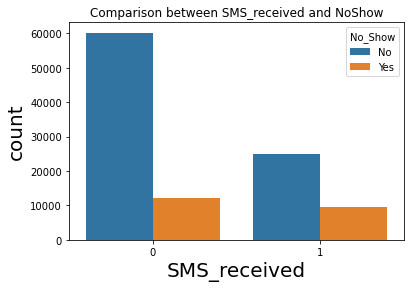

In [1336]:
plt.title('Comparison between SMS_received and NoShow')
countplot(df.SMS_received,df.No_Show)

From the graph, on the x axis, 0 means those who did not receive SMS for their appointment day and 1 is those who received SMS for their appoinment day,and y axis is for the number of counts in the No_show.

Blue bar shows those who showed up for the appointment day while orange is for those who did not show up for the appointment. 

Those who did not receive SMS and showed up for their appointment are higher in number than those that received SMS and showed up. 

### Question 2  Does Gender affect the number of patients who show up

In [1337]:
#Checking information on gender and No_show
df['No_Show'].groupby(df['Gender']).value_counts()

Gender  No_Show
F       No         55756
        Yes        14243
M       No         29389
        Yes         7388
Name: No_Show, dtype: int64

In [1338]:
Females_that_came = len(df[(df['Gender']== 'F' ) & (df['No_Show']=='No')]) / len(df[df['Gender'] == 'F'])*100
print('Percentage of female that showed up  = {0:0.1f} %'.format(Females_that_came ))

Percentage of female that showed up  = 79.7 %


In [1339]:
Males_that_came = len(df[(df['Gender']== 'M' ) & (df['No_Show']=='No')]) / len(df[df['Gender'] == 'M'])*100
print('Percentage of male that showed up  = {0:0.1f} %'.format(Males_that_came ))

Percentage of male that showed up  = 79.9 %


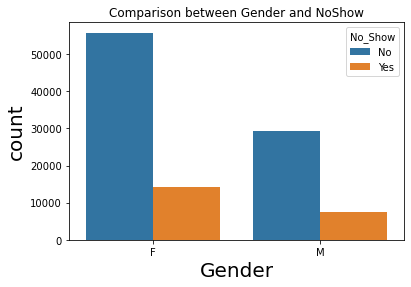

In [1340]:
plt.title('Comparison between Gender and NoShow')
countplot(df.Gender,df.No_Show)


From the graph above, x axis represents F for female and M for males

Blue bar shows the gender(Male or female) who showed up on their appointment day while orange shows the gender (male or female) who did not show up on their appointment day.

The number of females who showed up for their appointment is higher in number compared to the males who showed up for on their appointment day

### Question 3: How many patients showed up on the appointment date as scheduled 


In [1341]:
#Checking those whose days after appointment is o and they showed up
df[(df.No_Show=='No')&(df.DaysAfterAppointment==0)]



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show,DaysAfterAppointment,AgeGroup
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,60-70
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,50-60
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,60-70
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1-10
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110511,8.235996e+11,5786742,F,2016-06-08,2016-06-08,14,MARIA ORTIZ,0,0,0,0,0,0,No,0,10-20
110512,9.876246e+13,5786368,F,2016-06-08,2016-06-08,41,MARIA ORTIZ,0,0,0,0,0,0,No,0,40-50
110513,8.674778e+13,5785964,M,2016-06-08,2016-06-08,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No,0,1-10
110514,2.695685e+12,5786567,F,2016-06-08,2016-06-08,58,MARIA ORTIZ,0,0,0,0,0,0,No,0,50-60


In [1342]:
Appointment_as_scheduled = len(df[(df['DaysAfterAppointment']==0 ) & (df['No_Show']=='No')]) / len(df[df['DaysAfterAppointment'] == 0])*100
print('Percentage of patients whose appointment was as scheduled  = {0:0.1f} %'.format(Appointment_as_scheduled ))

Percentage of patients whose appointment was as scheduled  = 95.3 %


In [1343]:
Appointment_as_scheduled = len(df[(df['DaysAfterAppointment']==0 ) & (df['No_Show']=='Yes')]) / len(df[df['DaysAfterAppointment'] == 0])*100
print('Percentage of patients that whose appointment was as scheduled and did not show up  = {0:0.1f} %'.format(Appointment_as_scheduled ))

Percentage of patients that whose appointment was as scheduled and did not show up  = 4.7 %


In [1344]:
Appointment_Notas_scheduled = len(df[(df['DaysAfterAppointment']>0 ) & (df['No_Show']=='No')]) / len(df[df['DaysAfterAppointment'] >0])*100
print('Percentage of patients that whose appointment was not as scheduled but attended  = {0:0.1f} %'.format(Appointment_Notas_scheduled ))

Percentage of patients that whose appointment was not as scheduled but attended  = 71.5 %


In [1345]:
Appointment_Notas_scheduled = len(df[(df['DaysAfterAppointment']>0 ) & (df['No_Show']=='Yes')]) / len(df[df['DaysAfterAppointment'] >0])*100
print('Percentage of patients that whose appointment was not as scheduled and did not show up = {0:0.1f} %'.format(Appointment_Notas_scheduled ))

Percentage of patients that whose appointment was not as scheduled and did not show up = 28.5 %


Text(0.5, 1.0, 'Comparison between Days After Appointment and number of patients')

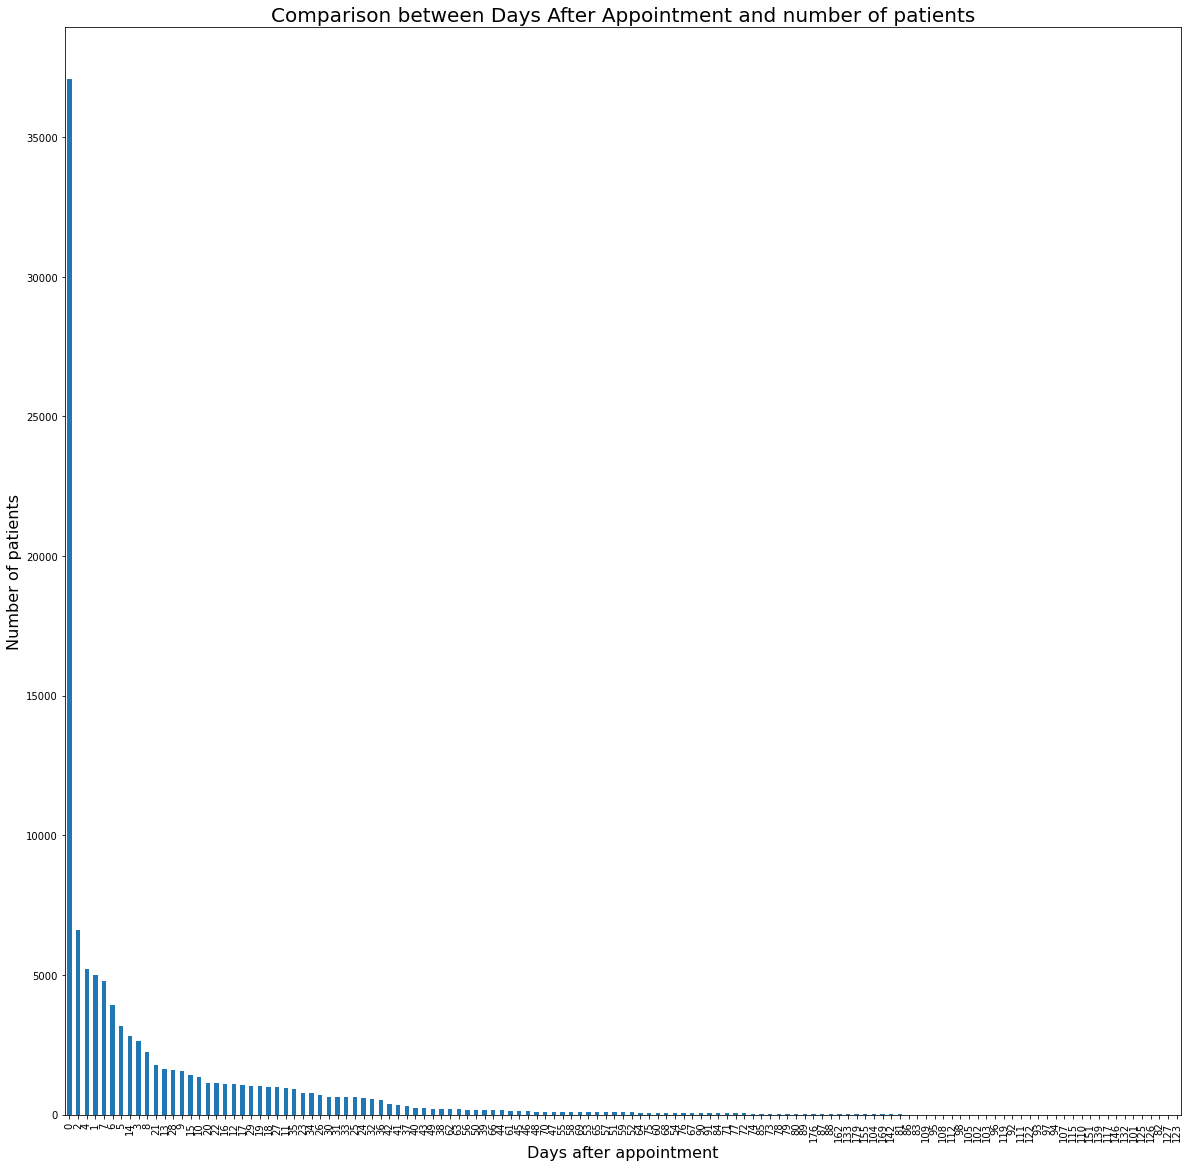

In [1346]:
plt.figure(figsize=[20,20])
df.DaysAfterAppointment.value_counts().sort_values(ascending=False).plot(kind ='bar')
plt.xticks(rotation=90)
plt.xlabel('Days after appointment', fontsize=16)
plt.ylabel('Number of patients', fontsize=16)
plt.title('Comparison between Days After Appointment and number of patients', fontsize=20)













From the graph above, X axis represents the Days patients waited after they booked an appointment and y axis is for the number of counts for the No_show/

From observation, those whose appointment day was as scheduled showed up in higher number than those whose appointment day was not as scheduled.

### Question 4: Is age group a factor to consider for show up

In [1347]:
#Checking information on Agegroup and No_show
df['No_Show'].groupby(df['AgeGroup']).value_counts()

AgeGroup  No_Show
1-10      No         11082
          Yes         2842
10-20     No          9645
          Yes         3251
20-30     No         10308
          Yes         3377
30-40     No         11852
          Yes         3295
40-50     No         11311
          Yes         2878
50-60     No         13073
          Yes         2769
60-70     No         10072
          Yes         1786
70-80     No          5018
          Yes          900
80-90     No          2459
          Yes          452
90-100    No           321
          Yes           81
Name: No_Show, dtype: int64

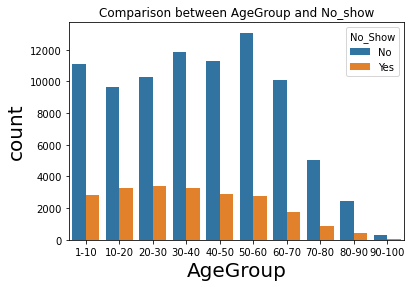

In [1348]:
#Graphical representation for Gender against No_Show
plt.title('Comparison between AgeGroup and No_show')
countplot(df.AgeGroup,df.No_Show)

From the above graph, X axis represents the Age groups while Y-axis represents the counts in the No_show

Blue bar represents the age group that showed up on their appointment day while orange bar is the age group that did not show up on their appointment day. 

Those in the age bracket between 50 and 60 showed up in higher number compared to the rest. Those in the age bracket between 70 to 100 showed up in less numbers compared to the rest.  

### 5.Does Neighbourhood affect showing up of the patients

In [1349]:
#Information about the neighbourhood 
df.Neighbourhood

0           JARDIM DA PENHA
1           JARDIM DA PENHA
2             MATA DA PRAIA
3         PONTAL DE CAMBURI
4           JARDIM DA PENHA
                ...        
110522          MARIA ORTIZ
110523          MARIA ORTIZ
110524          MARIA ORTIZ
110525          MARIA ORTIZ
110526          MARIA ORTIZ
Name: Neighbourhood, Length: 106776, dtype: object

In [1350]:
#Checking information on Neighbourhood and No_show
df['No_Show'].groupby(df['Neighbourhood']).value_counts()

Neighbourhood    No_Show
AEROPORTO        No            7
                 Yes           1
ANDORINHAS       No         1679
                 Yes         505
ANTÔNIO HONÓRIO  No          212
                            ... 
TABUAZEIRO       Yes         551
UNIVERSITÁRIO    No          119
                 Yes          32
VILA RUBIM       No          686
                 Yes         139
Name: No_Show, Length: 160, dtype: int64

Text(0, 0.5, 'Counts')

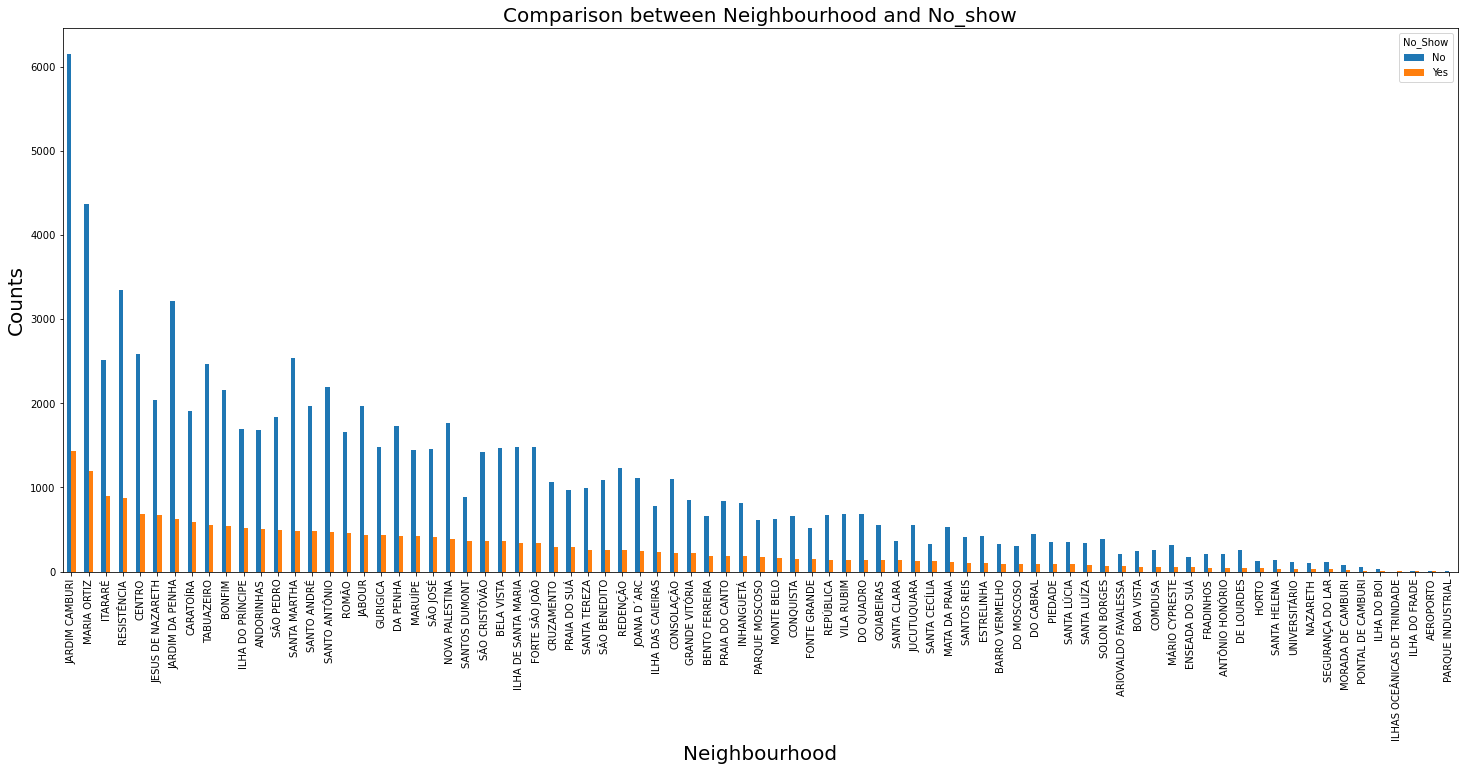

In [1367]:
#Comparing neighbourhood to show up
df.groupby('Neighbourhood')['No_Show'].value_counts().unstack().sort_values(by = 'Yes' , ascending = False).plot(kind = 'bar',figsize=(25,10))
plt.title('Comparison between Neighbourhood and No_show',fontsize=20)
plt.xlabel("Neighbourhood",fontsize=20)
plt.ylabel("Counts",fontsize=20)

From the graph above, x axis represents the neighbourhoods and y axis is for the counts of No_show

Blue bar represents the neighbourhoods that showed up on their appointment day and y axis represents the neighbourhoods that did not show up on their appointment day. 

The highest bar is for the neighbourhood that showed up on their appointment day in large numbers compared to the rest. 

### 6. Does Scholarship affect showing up 


In [1352]:
#Checking information on Scholarship and No_show
df['No_Show'].groupby(df['Scholarship']).value_counts()

Scholarship  No_Show
0            No         76924
             Yes        19061
1            No          8221
             Yes         2570
Name: No_Show, dtype: int64

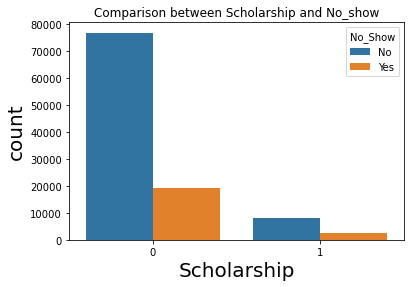

In [1353]:
#Comparing scholarship to show up
plt.title('Comparison between Scholarship and No_show')
countplot(df.Scholarship,df.No_Show)

From the graph, in the x axis, 0 represents those who are not offered a scholarship and 1 is those who are offered a schoolarship while y axis represents the number of counts in the No_show

Blue bar represents those with or without scholarship that showed up on their appointment day while orange bar shows those with or without scholarship that did not show up on their appointment day. 

Those that are not offered scholarship and showed up on the appointment day are higher in number compared to those with a scholarship and showed up on the appointment day. 

### 7.Does having diabetes affect showing up 

In [1354]:
#Checking information on Diabetes and No_show
df['No_Show'].groupby(df['Diabetes']).value_counts()

Diabetes  No_Show
0         No         78667
          Yes        20209
1         No          6478
          Yes         1422
Name: No_Show, dtype: int64

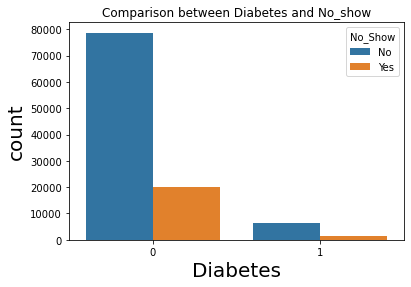

In [1355]:
#Comparing Diabetes to show up
plt.title('Comparison between Diabetes and No_show')
countplot(df.Diabetes,df.No_Show)

From the graph above, those with Diabetes are represented by 1 in the x axis and those without diabetes are represented by 0 in the x axis, y axis shows the number of counts in the No_show

Blue bar represents those who are with or without diabetes who showed up on the appointment day and orange bar is for those who are with or without dabetes and did not show up

Those that don't have diabetes and showed up and higher in number than those who are with diabetes and showed up. 

### 8.Does having Hypertension affect showing up 

In [1356]:
#Checking information on Hypertension and No_show
df['No_Show'].groupby(df['Hypertension']).value_counts()

Hypertension  No_Show
0             No         67178
              Yes        17883
1             No         17967
              Yes         3748
Name: No_Show, dtype: int64

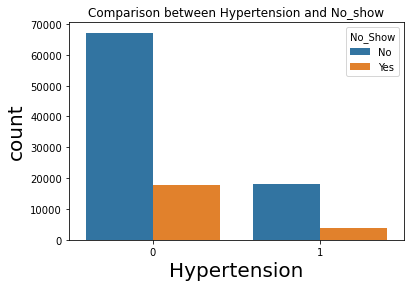

In [1357]:
#Comparing Hypertension to show up
plt.title('Comparison between Hypertension and No_show')
countplot(df.Hypertension,df.No_Show)

From the graph above, those with Hypertension are represented by 1 in the x axis and those without Hypertension are represented by 0 in the x axis, y axis shows the number of counts in the No_show

Blue bar represents those who are with or without hypertension who showed up on the appointment day and orange bar is for those who are with or without hypertension and did not show up

Those that don't have hypertension and showed up and higher in number than those who are with hypertension and showed up.

### 9.Does being handcap affect showing up

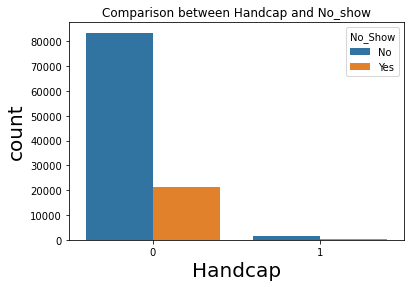

In [1358]:
#Comparing handcap to show up
plt.title('Comparison between Handcap and No_show')
countplot(df.Handcap,df.No_Show)

From the graph, on the x axis, 0 represents those who are not handcap and 1 are those who are handcap, y axis is for the counts in No_Show

Blue bar represents those who either are handcapped or not and showed up on the appointment day and orange is for those who are handcapped or not and did not show up on the appointment day.

Those who are not handcapped and showed up on the appointment day are higher in number than those who are handcapped and showed up on their appointment day. 

### 10.Does being alcoholic affect showing up

In [1359]:
#Checking information on Alcoholism and No_show
df['No_Show'].groupby(df['Alcoholism']).value_counts()

Alcoholism  No_Show
0           No         82468
            Yes        20956
1           No          2677
            Yes          675
Name: No_Show, dtype: int64

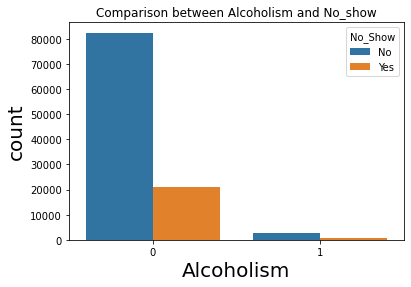

In [1360]:
#Comparing alcoholism to show up
plt.title('Comparison between Alcoholism and No_show')
countplot(df.Alcoholism,df.No_Show)

From the graph, on the x axis, 0 represents those who are not alcoholic and 1 are those who are alcoholic, y axis is for the counts in No_Show

Blue bar represents those who either are alcoholic or not and showed up on the appointment day and orange is for those who are alcoholic or not and did not show up on the appointment day.

Those who are not alcoholic and showed up on the appointment day are higher in number than those who are alcoholic and showed up on their appointment day.

In [1361]:
###


## Conclusion 


**After exploring our dataset with visuals, in this stage we are interested in finding out what factors to consider for us to know the outcome of patients that show up for their appointment day and also factors that won't be important to look into.**

From the Observations above, the following is what I deduced:
- **SMS** : Even though sending of SMS would have been an important factor to consider, the results of our outcome proved to be the opposite. The number of those who received SMS and showed up were less compared to those who did not receive SMS and showed up. For better outcome, those who are supposed to attend should be sent a reminder for this would make it an effective means of communication.
- The **Number of days after appointment** affects the outcome in that, the higher the waiting the higher the chance of the patient not to show up for the appointment. 
- **Gender** : This would not be vital because our dataset had more females than male and the difference in their attendance in percentage was very small.
- **Age**: Those aged betweed 50 and 60 years old are more likely to show up for their appointment. Similarly, atleast a higher attendance can be identified for those whose age lies between 1 and 70 years old, above 70 years old are not as much. 
- **Neighbourhood**: This will be a good factor to put in place as those living in Andorinhas will be highly likely to show up in large numbers to other neighbourhoods.
- **Alcoholism**: Those who are not Alcoholic are highly likely to show up as compared to those who are alcoholic
- **Scholarship**: Those without scholarship would show up as compared to those who don't have. 
- **Handcap**: This is not a good factor to consider as those who are handcap are less in number. 
- **Hypertension**: The probability of patients who have hypertension to attend to show is lower than those who don't have it
- **Diabetes**: This is not an important factor to consider as those with diabetes form a small fraction of our dataset.

## Limitations 

- There were some rows which were dropped which from my point of views caused a lot of data to be lost. 
- From my dataset, when I checked on the uniqueness, the appointment ID wasn't having any unique values and the number tallied with the rows in my dataset. The rows in the patient ID that were unique appeared to be in less numbers compared to the total rows expected which in my case could have shown an outcome of no uniqueness in the patient ID. 
- It was difficult to pull out an analysis on which patients could have shown up for the appointment day more than once due to the limited skills that I have so far acquired. 